<a href="https://colab.research.google.com/github/DeisyData/Instrumentaci-n/blob/main/Integrador_CurvaTermistor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1. Curva característiva y linealización del **Termistor**

### **Competencia**
C-II-01- Identificar las características dinámicas y estáticas de los sistemas de medición, así como las propiedades genéricas de los dispositivos (sensores, actuadores y transmisores), utilizando la hoja de datos del fabricante y métodos experimentales, para determinar criterios de funcionamiento, selección y desempeño de los

### **Resultado de aprendizaje**
RA-II-03-Interpreta las caracterisitcas estáticas y dinámicas de instrumentos de medición



Importar librarías


In [1]:
import ipywidgets as widgets
import numpy as np
from math import e
import matplotlib.pyplot as plt

# Parte I. Calcula Betha

Propósito: graficar la curva característica de un transistor NTC

Calcular el coeficiente B a partir de dos puntos conocidos.

$Betha=\frac{LnR_1-LnR_2}{\frac{1}{T_1}-\frac{1}{T_2}}$


In [2]:
R1 = float(input("Ingrese R1 en ohm "))
T1 = float(input("Ingrese T1 en celsius: "))
R2 = float(input("Ingrese R2 en ohm "))
T2 = float(input("Ingrese T2 en celsius: "))

Ingrese R1 en ohm 162.2
Ingrese T1 en celsius: 0
Ingrese R2 en ohm 3.3
Ingrese T2 en celsius: 100


Función para calcular bheta

In [3]:
def bethaT(R1,T1,R2,T2):
  T1 = T1 +273
  T2 = T2 +273
  num = (np.log(R1))-(np.log(R2))
  den =  (1/T1)-(1/T2)
  B = num/den
  return B

In [4]:
B = bethaT(R1,T1,R2,T2)
print("El valor Betha es: ", B)

El valor Betha es:  3966.1455345518684


In [5]:
Ro = float(input("Ingrese Ro en kohm "))
To = float(input("Ingrese To en celsius: "))+273

Ingrese Ro en kohm 250
Ingrese To en celsius: 25


In [7]:
 T = (np.linspace(253,373,119))
 Exponente = B*((1/T)-(1/To))
 base = np.exp(Exponente)
 R = Ro*base

# Parte II. Curva caracterísitica
La ecuación caracterísitica de un thermistor es:

(2) $R(T)=R_0 e^{B(\frac{1}{T}-\frac{1}{T_0})}$


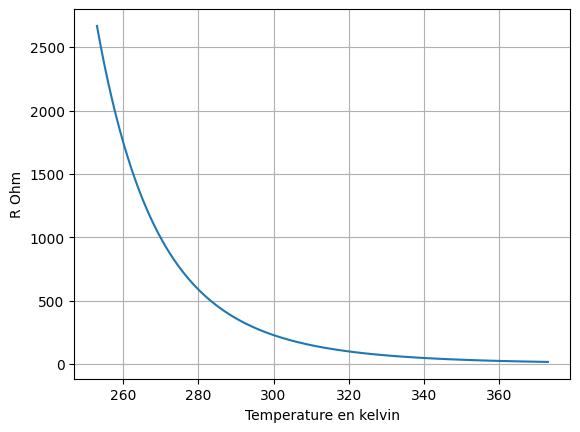

In [9]:
plt.plot(T,R)
plt.ylabel('R Ohm')
plt.xlabel('Temperature en kelvin')
plt.grid()

# Parte III. Linealización

Para abreviar se determina a la exponencial como $f(T)$

(3) $R(T)=R_0 f(T)$

Para poder linealizar se usará un divisor de tensión, entonces tenemos:

(4) $V_o = \frac{R_{ref}}{R(T) + R_{ref}} V_{ref}$

Reemplazando (3) en (4)

(5) $V_o = \frac{R_{ref}}{R_0 f(T) + R_{ref}} V_{ref}$

Dividiendo toda la expresión en $R_{ref}$

(6) $V_o = \frac{1}{\frac{R_0}{R_{ref}} f(T) + 1} V_{ref}$

donde

$k = \frac{R_0}{R_{ref}}$

Entonces

(7) $V_o = \frac{1}{k f(T) + 1} V_{ref}$


Generar diferentes gráficas para determinar cual es la mejor relación de $k$

In [10]:
Ro = float(input("Ingrese Ro en [Ohm]:"))

Ingrese Ro en [Ohm]:1000


In [11]:
Vref = float(input("Ingrese Vref en [V]: "))

Ingrese Vref en [V]: 5


Ingrese  el valor de k:  2530
El valor de  Rref será  0.3952569169960474 kOhm


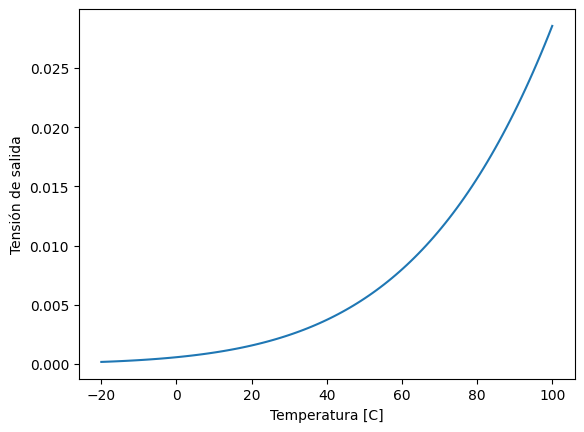

In [12]:
k = float(input("Ingrese  el valor de k:  "))

Rref = Ro/k;

print("El valor de  Rref será ", Rref, "kOhm")

To = 25+273;
T = (np.linspace(253,373,119))
Exponente = B*((1/T)-(1/To))
base = np.exp(Exponente) ## base == f(T)
Vo = (1 / (k*base+1)) * Vref;

T = (np.linspace(253,373,119)) -273
plt.plot(T,Vo)
plt.ylabel('Tensión de salida')
plt.xlabel('Temperatura [C]')
plt.show()